# Load V-Plot Matrices of Spatially Correlated Cleavage from WLCsim Ensembles & Plot
author: Ariana Brenner Clerkin <br> env: graphing 

This script is was copied from 2022.06.03_ChickenBlood_FLDs_highinternuc.ipynb -- But the vplot portion was just added to the end of the notebook used for plotting FLDs, so here the V-Plot portion alone is further developed and the script is cleaned up

Exponential cutoff of 4.03nm

In [1]:
# import sys
# sys.path.insert(0, '/lustre/fs4/risc_lab/store/abrenner/scripts/wlcsim_analysis/wlcsim')

### Import Modules

In [2]:
# import analysis.MCsim as mc
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import cm
import copy
# sys.path.insert(0, '/lustre/fs4/risc_lab/store/abrenner/scripts/wlcsim_analysis')
import utility as util

##### Global Vars

In [3]:
cmap = plt.get_cmap('plasma').colors
mpl.rcParams['savefig.transparent'] = True
main_dir = '/ru-auth/local/home/abrenner/myscratch/sims/sedimentation_sims/2022.06.09_207nrl_12mer/207_nrl_12nucs_'

trial_labels = []
for i in np.arange(1, 4):
    trial_labels.append(str(i) + '_trial')

trials = []
for i in range(len(trial_labels)):
    trials.append(trial_labels[i] + '/wlcsim/data/')
    
# Ignore the first eq snapshots
eq = 10
# Total snapshots per simulation
timePts = 200
maxfrag = 1000 # for fld
fig_folder = '/ru-auth/local/home/abrenner/mystore/analysis/wlcsim_figures/2022.08.17_wlcsim_contact_maps_vplots/2022.08.30_vplots_various_kbt_207nrl/'
data_folder = '/ru-auth/local/home/abrenner/myscratch/intermed_data/2022.08.24_vplot_inputs/'

# Wlcsim parameters
nrl = 207 
wrap = 127.
linker_len = nrl - wrap
fiber_half_length = (12. * nrl + linker_len)/2.

In [4]:
midpoint_max = 1200
midpoint_min = -1.*1200
min_y_range = 0
max_y_range = 1000
midpoint_binning = 1
frag_bin_width = midpoint_binning

##### Functions

In [5]:
def vPlot(vplot_matrix  # Use if v-plot matrix already generated
          , fig_name = 'vplot_test'
#           , min_y_range = 0
          , max_y_range = 1000
          , min_range = -1200
          , max_range = 1200
          , labl_size = 14
          , scale = np.nan
         ):
    
    total_num_vplots_cols = 1200
    vplot_matrix = vplot_matrix[(min_range + total_num_vplots_cols):(max_range+total_num_vplots_cols),-1*max_y_range:]
    mpl.rcParams['xtick.labelsize'] = labl_size
    mpl.rcParams['ytick.labelsize'] = labl_size
    mpl.rcParams['axes.titlesize'] = labl_size
    mpl.rcParams['axes.labelsize'] = labl_size
    #Need to change color of null values, no values <50bp
    cmap_current = copy.copy(mpl.cm.get_cmap("seismic"))
    cmap_current.set_bad(color='white')
    #     current_cmap = matplotlib.cm.get_cmap()
#     current_cmap.set_bad(color='red') # set nulls as black

    fig, ax = plt.subplots(2,1,figsize = (8,6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)
    plt.title('Internuc. Scaling: '+str(np.round(2.7*scale,2))+'kBT')
    occupancy = ax[0].plot(range(min_range, max_range), nuc_occupancy[int(min_range+fiber_half_length):int(max_range+fiber_half_length)], linewidth=3)
    ax[0].set_ylabel('Nuc. \n Occupancy')
    ax[0].set_xlim((min_range,max_range))
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)
    # row_means = np.mean(vplot_func_test.T, axis=1)
    im = ax[1].imshow(vplot_matrix.T, cmap=cmap_current, extent = [min_range, max_range, min_y_range, max_y_range])
    # ax[1] = sns.heatmap(v_plot_empty.T, extent = [min_range, max_range, min_y_range, max_y_range])
    ax[1].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
    ax[1].set_ylabel('Fragment \n Length (nt)')
    # ax[1,1].plot(fld1, range(50,501), color = 'black')
    # ax[1,1].set_xlabel('Freq.')
    plt.tight_layout()
#     plt.savefig(fig_folder+fig_name+'.pdf')
    plt.show()
    return 

In [6]:
def vPlot_lmh(vplot_matrix  # Use if v-plot matrix already generated
          , vp2
          , vp3
          , min_y_range = 0
          , max_y_range = 1000
          , min_range = -1200
          , max_range = 1200
          , labl_size = 14
          , scale = np.repeat(np.nan,3)
          , prefix = ''
         ):
    
    # Subset to zoomed in rows and cols
    total_num_vplots_cols = 1200
    vplot_matrix = vplot_matrix[(min_range + total_num_vplots_cols):(max_range+total_num_vplots_cols),-1*max_y_range:]    
    vp2 = vp2[(min_range + total_num_vplots_cols):(max_range+total_num_vplots_cols),-1*max_y_range:]    
    vp3 = vp3[(min_range + total_num_vplots_cols):(max_range+total_num_vplots_cols),-1*max_y_range:]    
    
    mpl.rcParams['xtick.labelsize'] = labl_size
    mpl.rcParams['ytick.labelsize'] = labl_size
    mpl.rcParams['axes.titlesize'] = labl_size
    mpl.rcParams['axes.labelsize'] = labl_size
    
    # Need to change color of null values, no values <50bp
    cmap_current = copy.copy(mpl.cm.get_cmap("seismic"))
    cmap_current.set_bad(color='white')

    fig, ax = plt.subplots(4,1,figsize = (6,10), gridspec_kw={'height_ratios': [1, 12, 12, 12]}, sharex=True)
    
    # Plot Nuc. Occupancy
    occupancy = ax[0].plot(range(min_range, max_range), nuc_occupancy[int(min_range+fiber_half_length):int(max_range+fiber_half_length)], linewidth=3)
    ax[0].set_ylabel('Nuc. \n Occupancy')
    ax[0].set_xlim((min_range,max_range))
    ax[0].spines['right'].set_visible(False)
    ax[0].spines['top'].set_visible(False)

    # Plot V-Plots
    ax[1].set_title('Internuc. Scaling: '+str(np.round(2.7*scale[0],2))+'kBT')
    ax[2].set_title('Internuc. Scaling: '+str(np.round(2.7*scale[1],2))+'kBT')
    ax[3].set_title('Internuc. Scaling: '+str(np.round(2.7*scale[2],2))+'kBT')
    im = ax[1].imshow(vplot_matrix.T, cmap=cmap_current, extent = [min_range, max_range, min_y_range, max_y_range])
    ax[1].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
    ax[1].set_ylabel('Fragment \n Length (nt)')
    im = ax[2].imshow(vp2.T, cmap=cmap_current, extent = [min_range, max_range, min_y_range, max_y_range])
    ax[2].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
    ax[2].set_ylabel('Fragment \n Length (nt)')
    
    im = ax[3].imshow(vp3.T, cmap=cmap_current, extent = [min_range, max_range, min_y_range, max_y_range])
    ax[3].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
    ax[3].set_ylabel('Fragment \n Length (nt)')
    
    plt.tight_layout()
#     plt.savefig(fig_folder+ prefix +'vplot_low_medium_high.pdf')
    plt.show()
    return 

### Previously Saved Data was Loaded and V-Plot matrix was computed and saved as numpy array. <br>
This was done with the following script: 2022.08.30_create_and_plot_vplot_matrices.py  <br>
Executed with: execute_vplot.sh

### Make a nucleosome occupancy array

In [7]:
num_nucs = 40
link_array = np.zeros((int(linker_len)))
nuc_array = np.ones((int(wrap)))
nuc_occupancy = link_array
for i in range(0,num_nucs):
    nuc_occupancy = np.concatenate((nuc_occupancy, nuc_array))
    nuc_occupancy = np.concatenate((nuc_occupancy, link_array))
# plt.plot(nuc_occupancy[:1200])

# Load and Plot Single V-Plots 

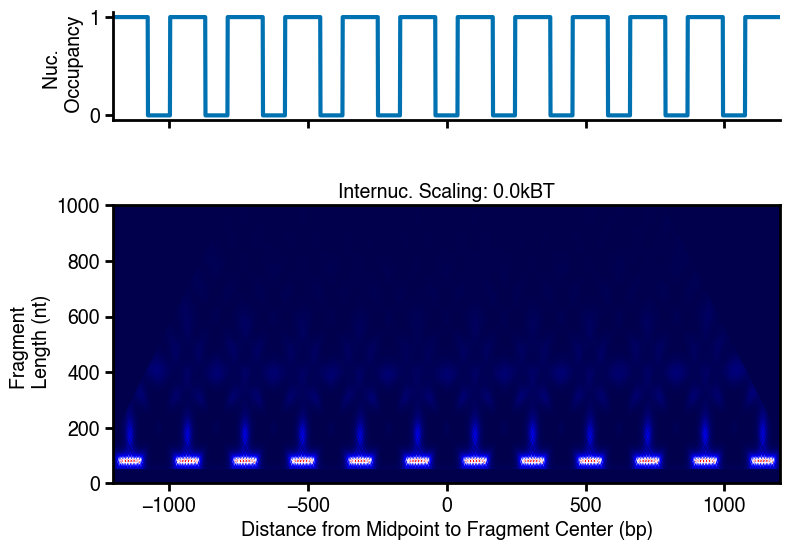

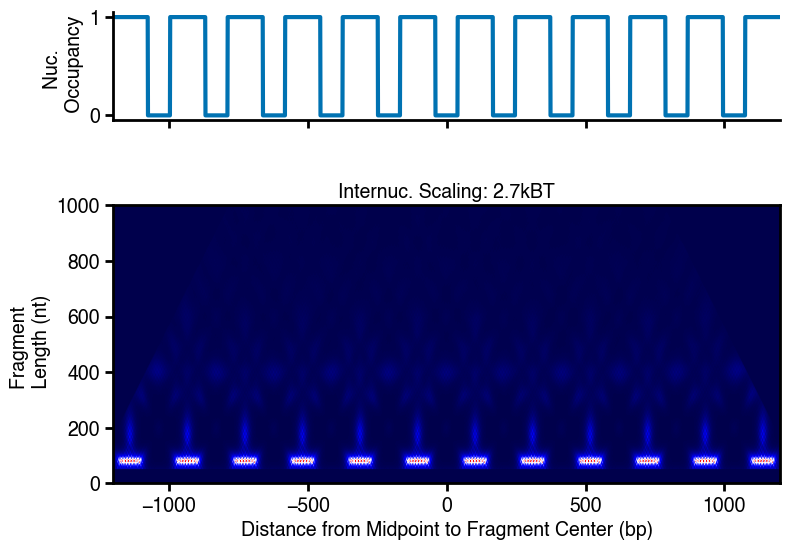

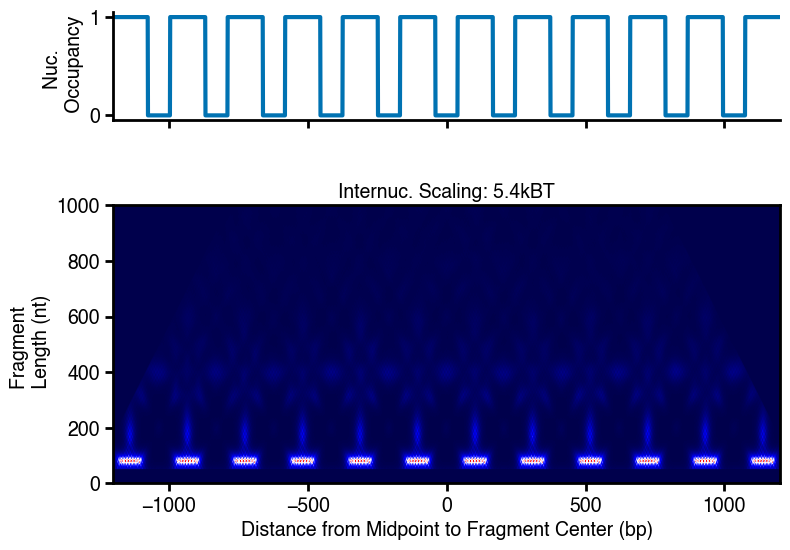

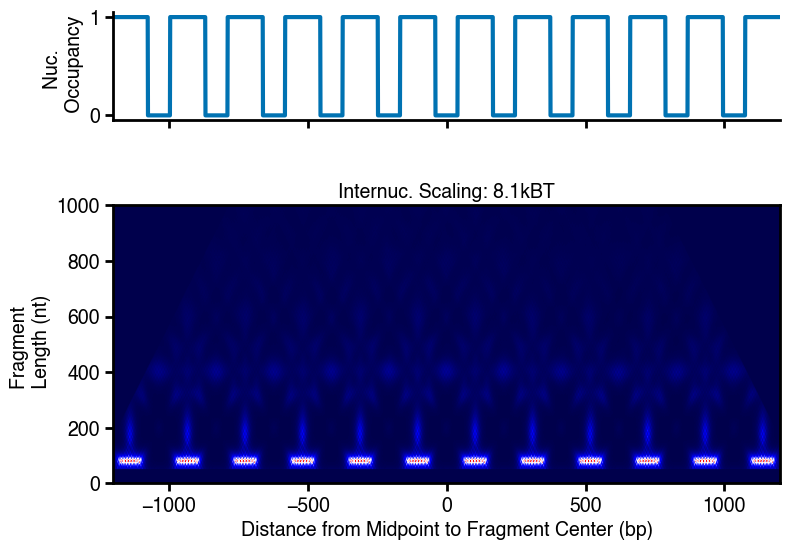

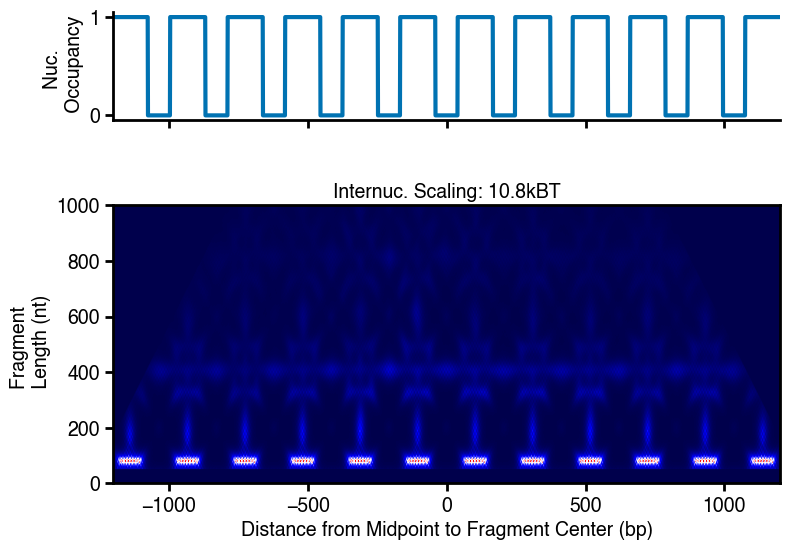

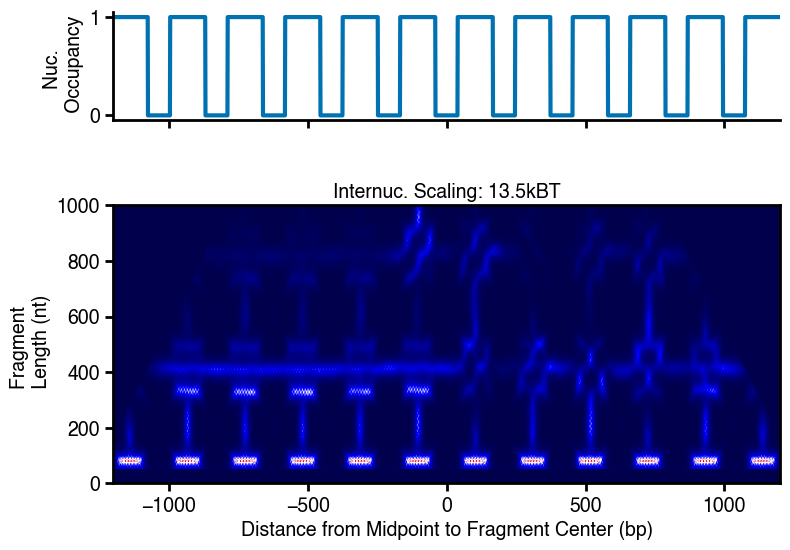

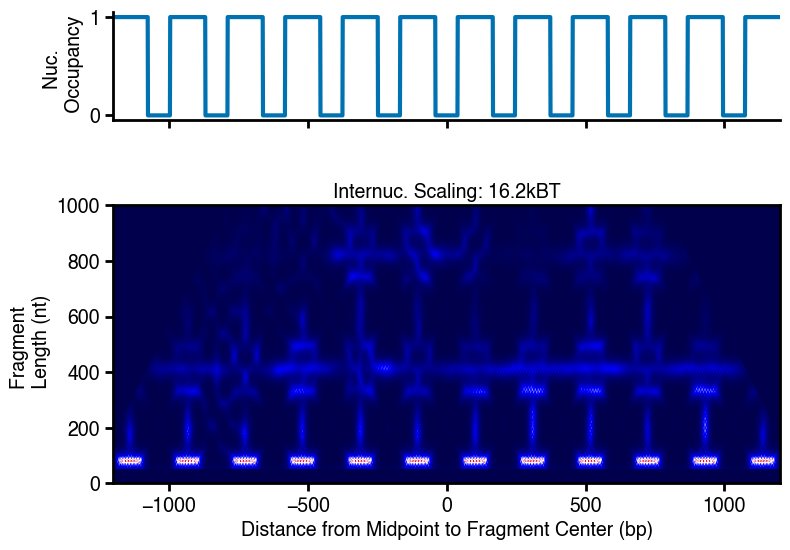

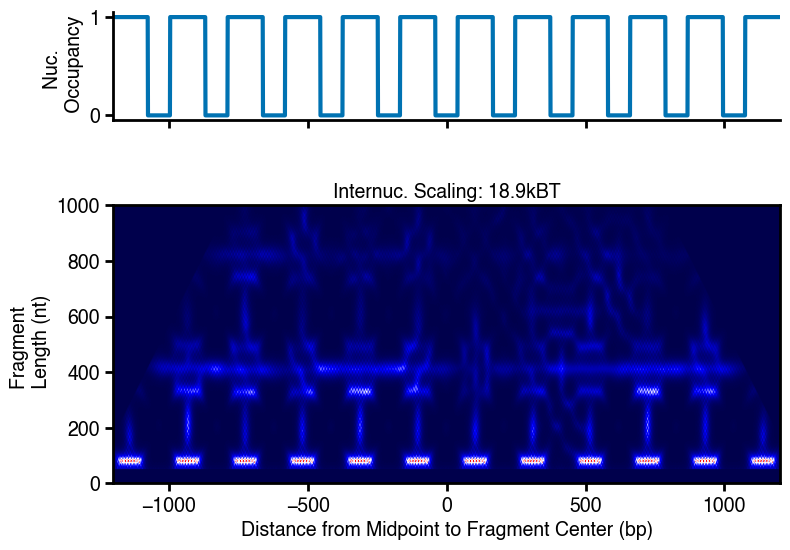

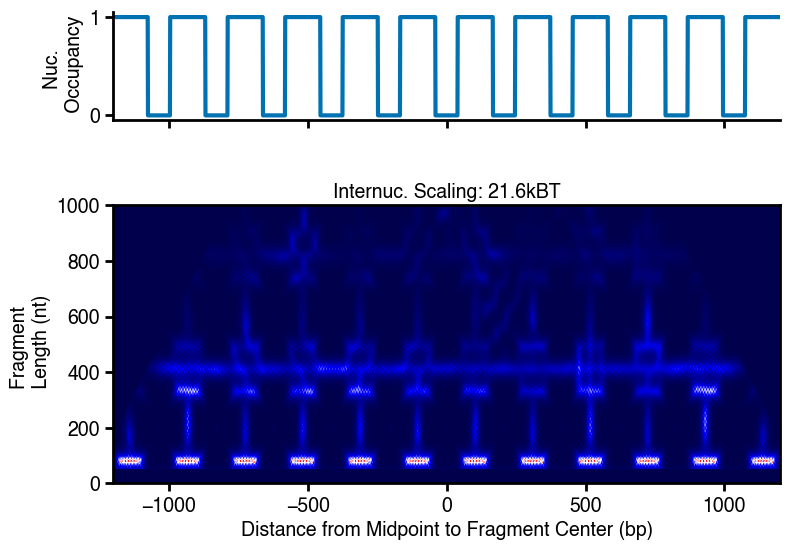

In [8]:
for nuc_scaling in range(0,9):
    vplot_loaded = np.load(data_folder+'vplot_input_'+str(midpoint_binning)+'bp_res_'+str(nuc_scaling)+'kbt.npy')
    vPlot(vplot_loaded, fig_name = 'TEMPvplot_'+str(midpoint_binning)+'bp_res_'+str(nuc_scaling)+'kbt', scale = nuc_scaling)

#### Plot 500bp from midpoint, Up to fragment length of 500bp

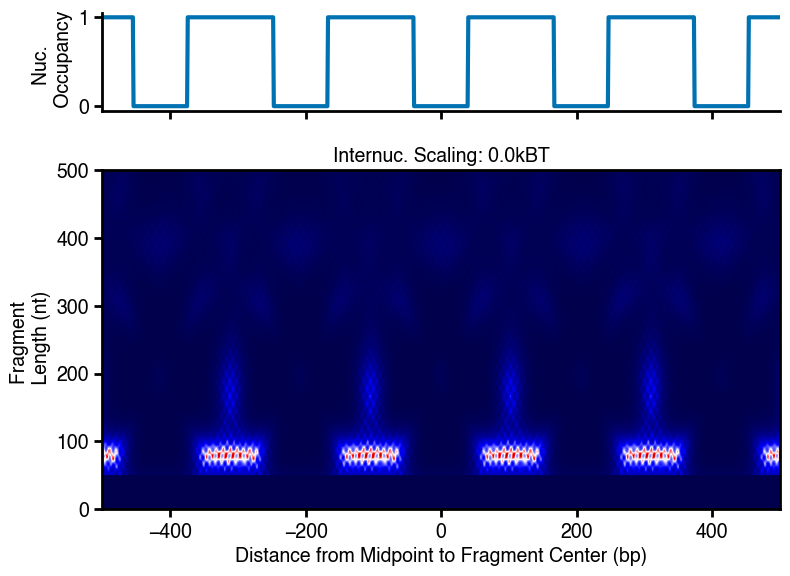

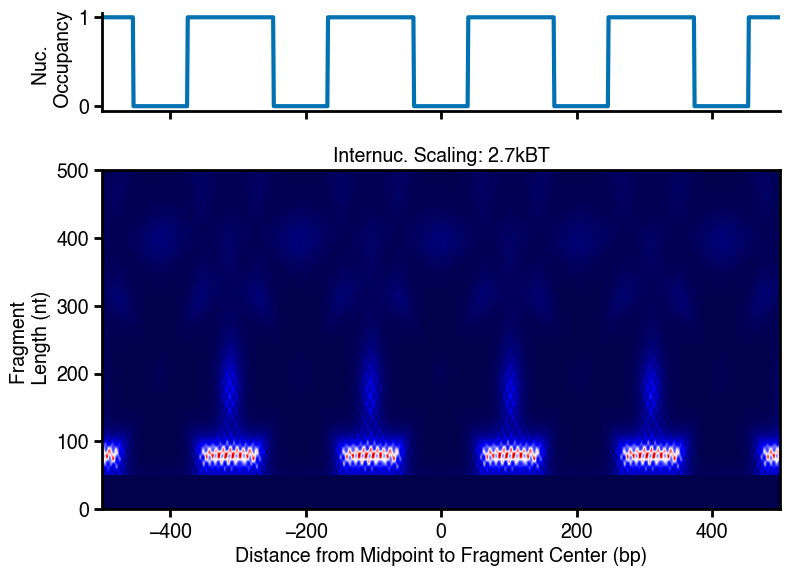

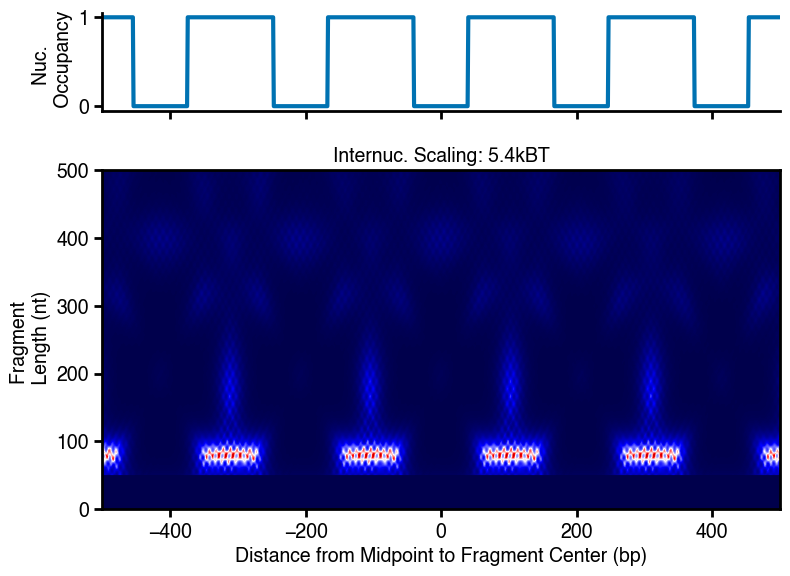

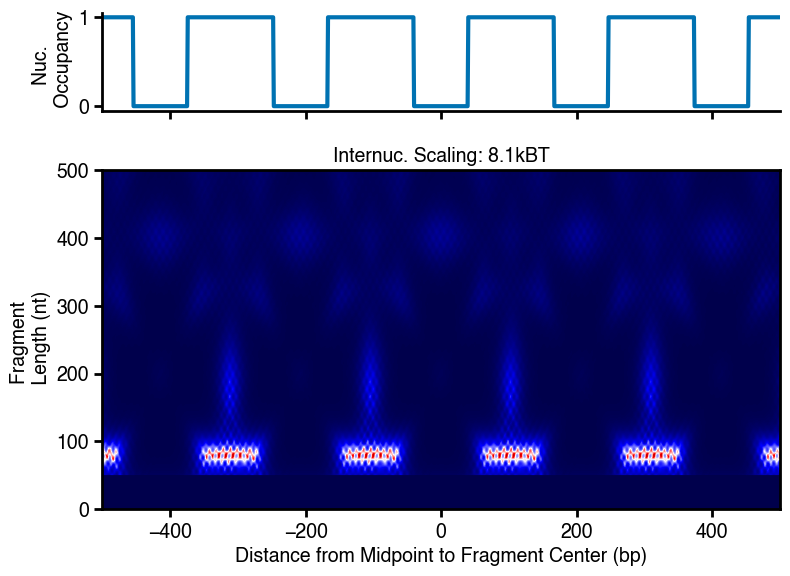

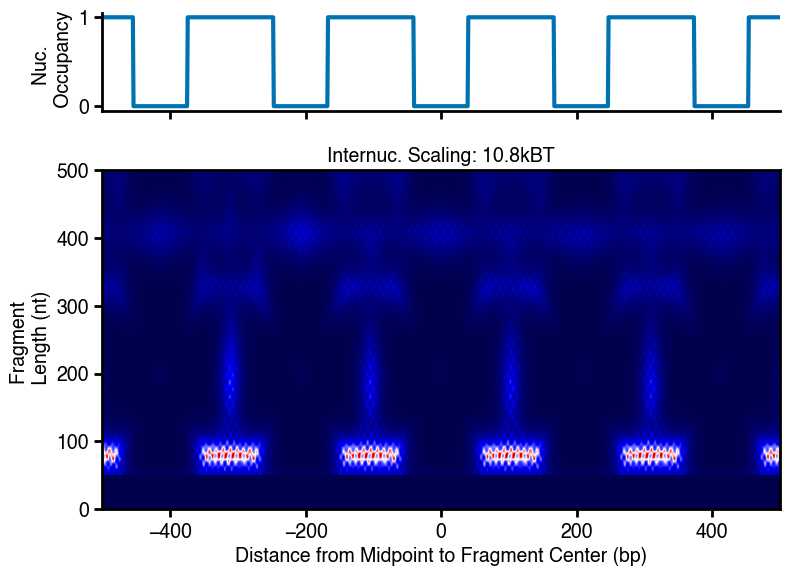

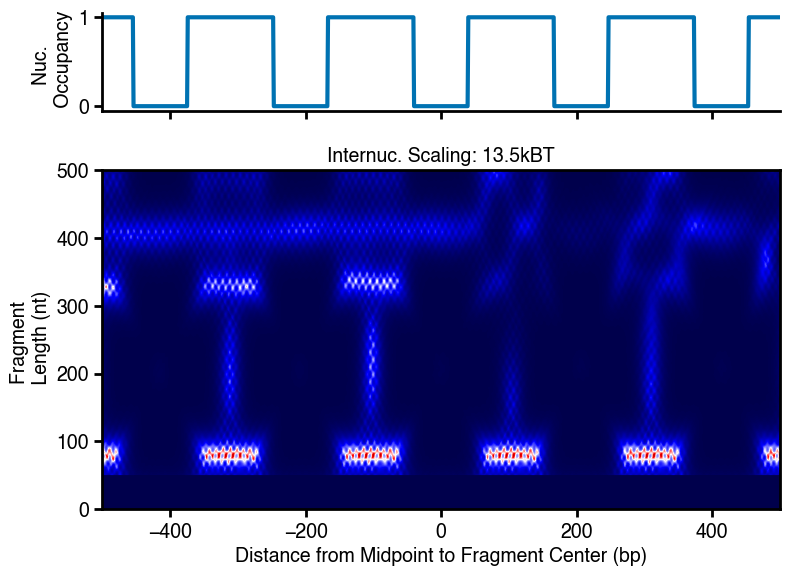

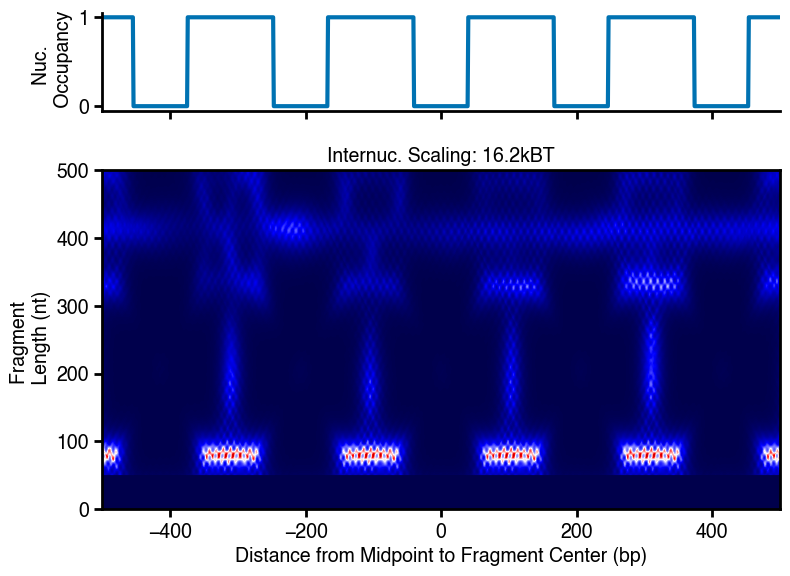

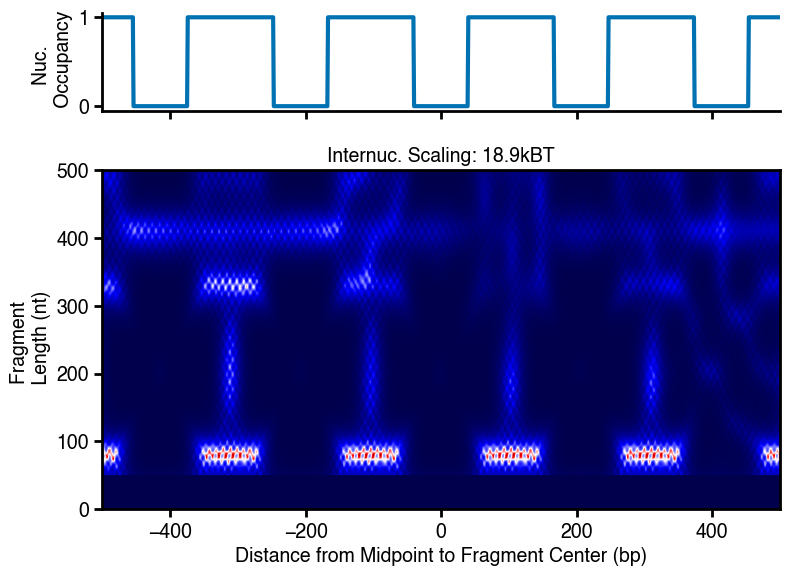

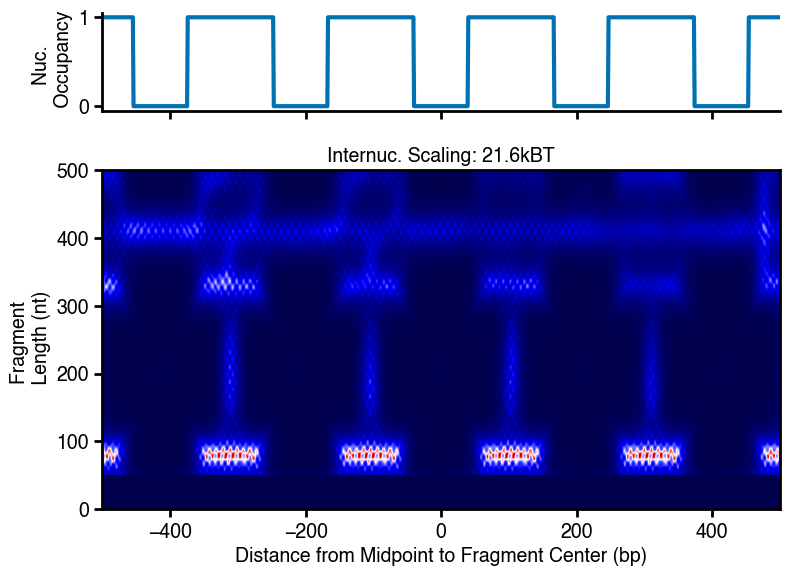

In [9]:
for nuc_scaling in range(0,9):
    vplot_loaded = np.load(data_folder+'vplot_input_'+str(midpoint_binning)+'bp_res_'+str(nuc_scaling)+'kbt.npy')
    vPlot(vplot_loaded, fig_name = 'TEMPvplot_zoomed_in'+str(midpoint_binning)+'bp_res_'+str(nuc_scaling)+'kbt', scale = nuc_scaling, min_range = -500, max_range = 500, max_y_range = 500)

# Plot Low, Medium, and High Together 

In [10]:
vplot_0kbt = np.load(data_folder+'vplot_input_'+str(midpoint_binning)+'bp_res_'+str(0)+'kbt.npy')
vplot_3kbt = np.load(data_folder+'vplot_input_'+str(midpoint_binning)+'bp_res_'+str(3)+'kbt.npy')
vplot_6kbt = np.load(data_folder+'vplot_input_'+str(midpoint_binning)+'bp_res_'+str(6)+'kbt.npy')

#### Plot 1,200bp from midpoint, Up to fragment length of 1,000bp

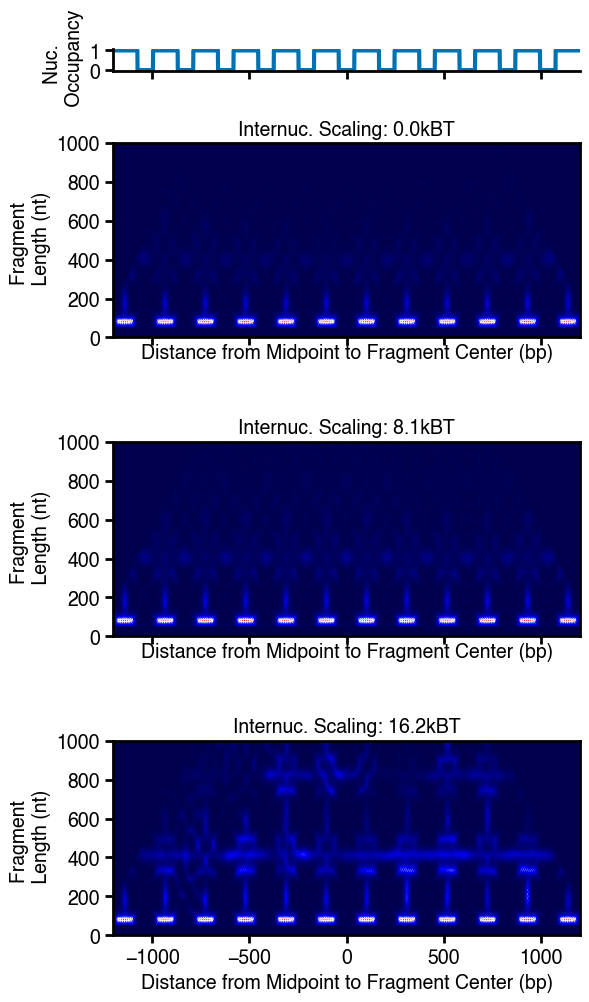

In [11]:
vPlot_lmh(vplot_0kbt, vplot_3kbt, vplot_6kbt, scale=[0,3,6], prefix = 'TEMP')

#### Plot 500bp from midpoint, Up to fragment length of 500bp

In [ ]:
vPlot_lmh(vplot_0kbt, vplot_3kbt, vplot_6kbt, scale=[0,3,6], min_range = -500, max_range = 500, max_y_range = 500, prefix = 'TEMPzoomed500_')

In [ ]:
nuc_scaling=2
vplot_loaded = np.load(data_folder+'vplot_input_'+str(midpoint_binning)+'bp_res_'+str(nuc_scaling)+'kbt.npy')
vPlot(vplot_loaded, fig_name = 'TEMPvplot_zoomed_in'+str(midpoint_binning)+'bp_res_'+str(nuc_scaling)+'kbt', scale = nuc_scaling, min_range = -500, max_range = 500, max_y_range = 500)

In [ ]:
# fig_name = 'vplot_test'
# max_y_range = 500
# min_range = -600
# max_range = 600
# labl_size = 14
# scale = np.nan

# vplot_matrix = np.log2(vplot_loaded/np.max(vplot_loaded)+0.000001)
# total_num_vplots_cols = 1200
# vplot_matrix = vplot_matrix[(min_range + total_num_vplots_cols):(max_range+total_num_vplots_cols),-1*max_y_range:]
# mpl.rcParams['xtick.labelsize'] = labl_size
# mpl.rcParams['ytick.labelsize'] = labl_size
# mpl.rcParams['axes.titlesize'] = labl_size
# mpl.rcParams['axes.labelsize'] = labl_size
# #Need to change color of null values, no values <50bp
# cmap_current = copy.copy(mpl.cm.get_cmap("seismic"))
# cmap_current.set_bad(color='white')
# # current_cmap = matplotlib.cm.get_cmap()
# # current_cmap.set_bad(color='red') # set nulls as black

# fig, ax = plt.subplots(2,2,figsize = (8,6), gridspec_kw={'height_ratios': [1, 4]}, sharex='col', sharey='row')
# plt.title('Internuc. Scaling: '+str(np.round(2.7*scale,2))+'kBT')
# occupancy = ax[0, 0].plot(range(min_range, max_range), nuc_occupancy[int(min_range+fiber_half_length):int(max_range+fiber_half_length)], linewidth=3)
# ax[0, 0].set_ylabel('Nuc. \n Occupancy')
# ax[0, 0].set_xlim((min_range,max_range))
# ax[0, 0].spines['right'].set_visible(False)
# ax[0, 0].spines['top'].set_visible(False)
# # row_means = np.mean(vplot_func_test.T, axis=1)
# im = ax[1, 0].imshow(vplot_matrix.T, cmap=cmap_current, extent = [min_range, max_range, min_y_range, max_y_range], vmin = -8)
# # ax[1] = sns.heatmap(v_plot_empty.T, extent = [min_range, max_range, min_y_range, max_y_range])
# ax[1, 0].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
# ax[1, 0].set_ylabel('Fragment \n Length (nt)')
# ax[1,1].plot(np.sum(vplot_loaded, axis = 0)[499:-50][::-1], np.arange(50,501))
# # ax[1,1].set_xlabel('Freq.')
# # Adding the color bar
# # cbar = fig.colorbar(im, ax=ax.ravel().tolist(), orientation='vertical')
# # cbar.set_label('Intensity')
# # cbar.set_clim(-10,0)

# # plt.tight_layout()
# # 

# # plt.savefig(fig_folder+fig_name+'.pdf')
# plt.show()

In [ ]:
# fig_name = 'vplot_test'
# max_y_range = 500
# min_range = -600
# max_range = 600
# labl_size = 14
# scale = np.nan

# vplot_matrix = vplot_loaded/np.max(vplot_loaded)
# total_num_vplots_cols = 1200
# vplot_matrix = vplot_matrix[(min_range + total_num_vplots_cols):(max_range+total_num_vplots_cols),-1*max_y_range:]
# mpl.rcParams['xtick.labelsize'] = labl_size
# mpl.rcParams['ytick.labelsize'] = labl_size
# mpl.rcParams['axes.titlesize'] = labl_size
# mpl.rcParams['axes.labelsize'] = labl_size
# #Need to change color of null values, no values <50bp
# cmap_current = copy.copy(mpl.cm.get_cmap("seismic"))
# cmap_current.set_bad(color='white')
# # current_cmap = matplotlib.cm.get_cmap()
# # current_cmap.set_bad(color='red') # set nulls as black

# fig, ax = plt.subplots(2,1,figsize = (8,6), gridspec_kw={'height_ratios': [1, 4]}, sharex=True)
# plt.title('Internuc. Scaling: '+str(np.round(2.7*scale,2))+'kBT')
# occupancy = ax[0].plot(range(min_range, max_range), nuc_occupancy[int(min_range+fiber_half_length):int(max_range+fiber_half_length)], linewidth=3)
# ax[0].set_ylabel('Nuc. \n Occupancy')
# ax[0].set_xlim((min_range,max_range))
# ax[0].spines['right'].set_visible(False)
# ax[0].spines['top'].set_visible(False)
# # row_means = np.mean(vplot_func_test.T, axis=1)
# im = ax[1].imshow(vplot_matrix.T, cmap=cmap_current, extent = [min_range, max_range, min_y_range, max_y_range], vmax = 0.375)
# # ax[1] = sns.heatmap(v_plot_empty.T, extent = [min_range, max_range, min_y_range, max_y_range])
# ax[1].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
# ax[1].set_ylabel('Fragment \n Length (nt)')
# # ax[1,1].plot(fld1, range(50,501), color = 'black')
# # ax[1,1].set_xlabel('Freq.')
# # Adding the color bar
# cbar = fig.colorbar(im, ax=ax.ravel().tolist(), orientation='vertical')
# cbar.set_label('Intensity')
# # cbar.set_clim(-10,0)

# # plt.tight_layout()
# # 

# # plt.savefig(fig_folder+fig_name+'.pdf')
# plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
# from utility import *

# Assuming vplot_loaded is defined and contains data
fig_name = 'vplot_test'
max_y_range = 501
min_range = -600
max_range = 600
labl_size = 14
scale = np.nan  # Assuming this should be defined or calculated somewhere

# Data transformations
vplot_matrix_pre = vplot_loaded#np.log2(vplot_loaded / np.max(vplot_loaded) + 0.000001)
total_num_vplots_cols = 1200
vplot_matrix_pre = vplot_matrix_pre[(min_range + total_num_vplots_cols):(max_range + total_num_vplots_cols), -1 * max_y_range:]
vplot_matrix = np.log2(vplot_matrix_pre / np.max(vplot_matrix_pre) + 0.00000001)

# Matplotlib settings
mpl.rcParams['xtick.labelsize'] = labl_size
mpl.rcParams['ytick.labelsize'] = labl_size
mpl.rcParams['axes.titlesize'] = labl_size
mpl.rcParams['axes.labelsize'] = labl_size

# Color map for null values
cmap_current = copy.copy(mpl.cm.get_cmap("seismic"))
cmap_current.set_bad(color='white')

# Create the subplots
fig, ax = plt.subplots(2, 2, figsize=(6.5, 3), gridspec_kw={'height_ratios': [1, 2], 'width_ratios': [5, 1]})

# Plotting heatmap
im = ax[1, 0].imshow(vplot_matrix.T, cmap=cmap_current, aspect='auto', extent=[min_range, max_range, 0, max_y_range], vmin=-8)
ax[1, 0].set_xlabel('Distance from Midpoint to Fragment Center (bp)')
ax[1, 0].set_ylabel('Fragment \n Length (nt)')

# Plotting sum of rows on the right
start_to_plot = 50
fld = np.sum(vplot_matrix_pre, axis=0)[::-1][start_to_plot:]
log2fld = np.log2(fld/np.max(fld))
line_plot = ax[1,1].plot(log2fld, np.arange(start_to_plot, 501))
# line_plot = ax[1, 1].plot(np.sum(vplot_loaded, axis=0)[499:-50][::-1], np.arange(50, 501))
ax[1, 1].set_xlabel('Log$_2$(Norm. Count)')
# ax[1, 1].set_xlim(ax[1, 0].get_xlim())  # Ensure x-axis limits are the same
ax[1, 1].set_ylim(0, max_y_range)  # Manually set y-axis limits to match the imshow plot

# Plotting occupancy
occupancy = ax[0, 0].plot(range(min_range, max_range), nuc_occupancy[int(min_range + fiber_half_length):int(max_range + fiber_half_length)], linewidth=3)
ax[0, 0].set_ylabel('Nuc. \n Occupancy')
ax[0, 0].set_xlim(ax[1, 0].get_xlim())  #

# hide unneeded stuff 
ax[0, 0].spines['right'].set_visible(False)
ax[0, 0].spines['top'].set_visible(False)
ax[1, 1].spines['right'].set_visible(False)
ax[1, 1].spines['top'].set_visible(False)
ax[0, 1].axis('off')

# Adding the color bar
cbar_ax = fig.add_axes([1.0, 0.25, 0.02, 0.4])  #
cbar = fig.colorbar(im, cax=cbar_ax)
# cbar = fig.colorbar(im, ax=[ax[1, 0]], orientation='vertical')
cbar.set_label('Log$_2$(Norm. Count)')

plt.tight_layout()
plt.show()
